# Predicting the price of Diamonds using Machine Learning

In this notebook we are going to use some machine learning models to predict the sale price of diamonds of various properties.

## 1. Problem definition

> How accurtely can we predict the price of a diamond based on a features of a set of examples?

## 2. Data

The data is downloaded from the Kaggle datasets:
https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

### Short explanation of non-numeric columns:

* **color**:
 * D - highest color grade, nearly no color,
 * E - almost identical do D color diamonds, differences may only be visible to an expert gemologst,
 * F - nearly identical to D and E,
 * G - nearly no color and appear primarily colorless to the naked eye; best grade in the "Near Colorless" range; they may have some tints of color,
 * H - may appera primarily colorless to the naked eye, but have a faint yellow hue visible under magnification,
 * I - great combination of near colorless looks and good value formoney; slight yellow tint visible when compared with diamonds with a higher color grade,
 * J - mostly colorless to the naked eye, but have a faint yellow tint that is easy to notice under magnification.
 
* **cut** - quality of cut measured with given order (the higher the better):
 * Ideal,
 * Premium,
 * Very Good,
 * Good,
 * Fair.
 
* **clarity** - refers to the absence of inclusions and blemishes:
 * Flawless (FL) No inclusions and no blemishes visible under 10x magnification,
 * Internally Flawless (IF) No inclusions visible under 10x magnification,
 * Very, Very Slightly Included (VVS1 and VVS2) Inclusions so slight they are difficult for a skilled grader to see under 10x magnification,
 * Very Slightly Included (VS1 and VS2) Inclusions are observed with effort under 10x magnification, but can be characterized as minor,
 * Slightly Included (SI1 and SI2) Inclusions are noticeable under 10x magnification,
 * Included (I1, I2, and I3) Inclusions are obvious under 10x magnification which may affect transparency and brilliance.
 
 
### Short explanation for numeric columns

* **carat** - unit of weight for diamonds and other gemstones (One carat is equal to 200 miligrams or 0.2 grams),
* **depth** - given in percentagel; calculated by dividing the height by the diamond's width,
* **table** - given in percentage; calculated based on the size of the table, divided by the average girdle diameter of the diamond. A 60% table means that the table is 60% of the diamond's outline width,
* **x, y, z** - all of these values are given in milimeters,
* **price** - price is given in USD,

### Diamond measurements
<img src="data/diamond-measurements.png"/>

## 3. Evaluation

We will use `mean_squared_error()`, `mean_absolute_error`, `r2_score()` to evaluate our predictions.

**Our goal will be to minimize MAE and maximize R2 Score**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

/home/patryk/pythonAI/ml_projects/diamond-prices-prediction/env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [126]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import cross_val_score

In [3]:
# Import training and validation set
df = pd.read_csv("data/diamond_prices_2022.csv",
                 low_memory=False)

## Let's begin with some data familiarization

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# Check the datatypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
# Check if any rows are empty
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
# Let's check each of columns and try to explain the meaning of data
df.color.value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [12]:
df.cut.value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

In [13]:
df.clarity.value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [14]:
# Let's make a copy of df with shuffled data
df_shuffled = df.sample(frac=1,
                        random_state=42).reset_index()

In [15]:
df_shuffled.head()

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
1,19841,1.21,Very Good,F,VS2,62.9,54.0,8403,6.78,6.82,4.28
2,41647,0.50,Fair,E,SI1,61.7,68.0,1238,5.09,5.03,3.12
3,41741,0.50,Ideal,D,SI2,62.8,56.0,1243,5.06,5.03,3.17
4,17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


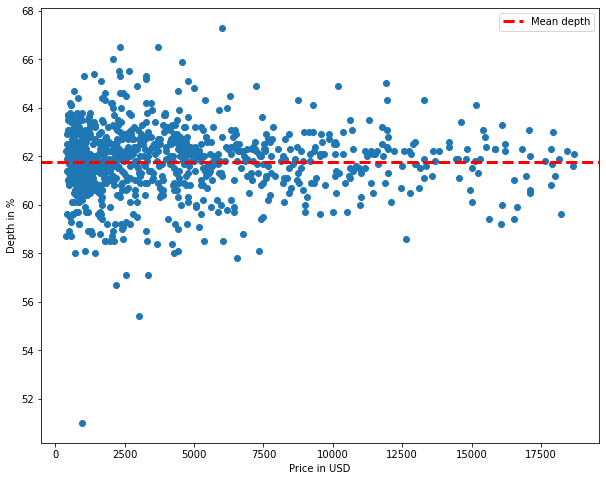

In [16]:
# Let's check how depth corresponds to price
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(df_shuffled.price[:1000], df_shuffled.depth[:1000])
# ax.plot(np.zeros_like(1000), 
#         np.mean(df_shuffled.depth[:1000]), 
#         label="Mean depth",
#         linestyle="--")
ax.axhline(df_shuffled.depth[:1000].mean(),
           color="red",
           linestyle="--",
           linewidth=3,
           label="Mean depth")
ax.legend()
ax.set(xlabel="Price in USD",
       ylabel="Depth in %");

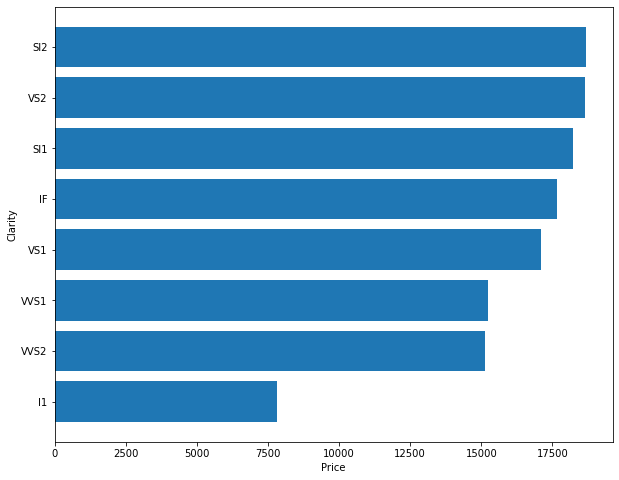

In [17]:
# Let's check which clarity corresponds the most to the price

df_tmp = (pd.DataFrame({"clarity": df_shuffled.clarity[:1000],
                    "price": df_shuffled.price[:1000]})
     .sort_values("price", ascending=False)
     .reset_index(drop=True))

fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(df_tmp.clarity[:1000], df_tmp.price[:1000])
ax.set(ylabel="Clarity",
       xlabel="Price")
ax.invert_yaxis();

## Converting non-numerical values into categories

In [57]:
df_shuffled.columns

Index(['index', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [58]:
# Output all string type columns
for label, content in df_shuffled.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

cut
color
clarity


In [59]:
# Let's turn all string values into categories
for label, content in df_shuffled.items():
    if pd.api.types.is_string_dtype(content):
        df_shuffled[label] = content.astype("category").cat.as_ordered()

In [60]:
# Turn categorical variables into numbers
for label, content in df_shuffled.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_shuffled[label] = pd.Categorical(content).codes + 1

In [61]:
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53943 non-null  int64  
 1   carat    53943 non-null  float64
 2   cut      53943 non-null  int8   
 3   color    53943 non-null  int8   
 4   clarity  53943 non-null  int8   
 5   depth    53943 non-null  float64
 6   table    53943 non-null  float64
 7   price    53943 non-null  int64  
 8   x        53943 non-null  float64
 9   y        53943 non-null  float64
 10  z        53943 non-null  float64
dtypes: float64(6), int64(2), int8(3)
memory usage: 3.4 MB


In [63]:
df_shuffled.head()

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,1388,0.24,3,4,7,62.1,56.0,559,3.97,4.00,2.47
1,19841,1.21,5,3,6,62.9,54.0,8403,6.78,6.82,4.28
2,41647,0.50,1,2,3,61.7,68.0,1238,5.09,5.03,3.12
3,41741,0.50,3,1,4,62.8,56.0,1243,5.06,5.03,3.17
4,17244,1.55,3,2,4,62.3,55.0,6901,7.44,7.37,4.61


### Save preprocessed data

In [65]:
# Export current df
df_shuffled.to_csv("data/diamond_prices_2022_preprocessed.csv")

Since this dataset is complete we don't have to fill any additional values, so we can go straight into modelling.

# Creating a model

In [80]:
# Create random seed
np.random.seed(42)

# Create a dictionary of model instances to train on our data
models = {"SGDRegressor": SGDRegressor(),
          "Lasso": Lasso(),
          "ElasticNet": ElasticNet(),
          "Ridge": Ridge(),
          "linear SVR": SVR(kernel="linear"),
          "RandomForestRegressor": RandomForestRegressor()}

# Create dictionaries for accuracy and score results
acc_results = {}
train_score_results = {}
test_score_results = {}

# Drop the index column
df_shuffled.drop('index', inplace=True, axis=1)

# Prepare features and labels
X = df_shuffled.drop("price", axis=1)
y = df_shuffled.price

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [82]:
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  int8   
 2   color    53943 non-null  int8   
 3   clarity  53943 non-null  int8   
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), int8(3)
memory usage: 3.0 MB


In [27]:
%%time
# Let's initially assess the accuracy
for name, model in models.items():
    # Fitting the current model
    print(f"Fitting {name}()...")
    model.fit(X_train, y_train)
    # Assessing the accuracy and score of a model
    print(f"Assessing {name}()...")
#     acc_results[name] = model.accuracy(X_test, y_test)
    train_score_results[name] = model.score(X_train, y_train)    
    test_score_results[name] = model.score(X_test, y_test)    

Fitting SGDRegressor()...


KeyboardInterrupt: 

In [69]:
train_score_results

{'SGDRegressor': -18031677.20650545,
 'Lasso': 0.8841822885914029,
 'ElasticNet': 0.7931687569710155,
 'Ridge': 0.8841984601653226,
 'linear SVR': 0.7853245972353544,
 'RandomForestRegressor': 0.9973173598086233}

In [70]:
test_score_results

{'SGDRegressor': -58007934.77202763,
 'Lasso': 0.8884649425740488,
 'ElasticNet': 0.7924870377738942,
 'Ridge': 0.8885427839124146,
 'linear SVR': 0.787448867973197,
 'RandomForestRegressor': 0.9813720885895214}

In [130]:
def assess_model(model, y_true, y_preds, X_test):
    """
    A function that uses mean_squared_error and r2_score to assess a model.
    """
    
    mse = mean_squared_error(y_true, y_preds)
    score = model.score(X_test, y_true)
    cvs = np.mean(cross_val_score(model, X, y, cv=5))
    max_err = max_error(y_true, y_preds)
    med_abs_err = median_absolute_error(y_true, y_preds)
    
    print(f"MSE: {mse}\nScore: {score * 100:.2f}\nMean Cross_val_score: {cvs * 100:.2f}\n" +
          f"Max error: {max_err}\nMedian absolute error: {med_abs_err}")

In [83]:
%%time

# Let's instantiate RandomForestRegressor and fit it to the data since it had the best score
# Set random seed
np.random.seed(42)

# Instantiate model
model = RandomForestRegressor()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

CPU times: user 11.3 s, sys: 24 ms, total: 11.3 s
Wall time: 11.3 s


In [84]:
# Assess model
assess_model(model, y_test, y_preds, X_test)

MSE: 323097.1207582218
R2 Score: 0.9798586211328488
Score: 97.99


In [85]:
y_preds[:10]

array([ 5479.51,   781.62,  2865.5 ,   653.01, 15829.44,   517.77,
        6110.61,  7924.66,  5751.61,   966.13])

In [86]:
y_test[:10]

1388      5408
19841      776
41647     3086
41741      658
17244    17012
1608       540
46401     6271
24625     7589
49388     5208
10460      972
Name: price, dtype: int64

In [74]:
y_test.values[:10]

array([ 5408,   776,  3086,   658, 17012,   540,  6271,  7589,  5208,
         972])

In [75]:
y_preds[:10]

array([ 5407.7 ,   775.99,  3085.49,   658.07, 17011.81,   534.5 ,
        6270.93,  7588.96,  5208.03,   972.  ])

# RandomizedSearchCV

Now we will experiment a bit with RandomizedSearchCV to check whether hyperparameters may be tuned better

In [87]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

275.9228134806615

In [77]:
# Instantiate RandomForestRegressor model and check its basic hyperparameters
rf_model = RandomForestRegressor(random_state=42)

rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [114]:
%%time

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid for most important hyperparameters
rf_grid = {"n_estimators": [50, 100, 200, 400],
           "max_features": [1, "sqrt"],
           "max_depth": [None, 10, 20, 40, 80],
           "min_samples_split": [2, 5, 10],
           "min_samples_leaf": [1, 2]}

# Create a RandomizedSearchCV model and fit to the data
rf_random = RandomizedSearchCV(rf_model,
                               param_distributions=rf_grid,
                               n_iter=50,
                               n_jobs=1,
                               cv=5,
                               verbose=2)

# Fit the RandomizedSearchCV model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  13.0s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  12.9s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  13.0s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  12.7s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=  12.7s
[CV] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   6.3s
[CV] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   6.3s
[CV] END max_depth=20, max_features=1, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total 

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   7.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=  10.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=  10.9s
[CV] END max_depth=None, max_

[CV] END max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=40, max_features=1, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END max_depth=40, max_features=sqrt, min_

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.4s
[CV] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=20, max_features=1, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=40, max_features=1, min_sample

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [None, 10, 20, 40, 80],
                                        'max_features': [1, 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 400]},
                   verbose=2)

In [115]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [120]:
# Instantiate model with best hyperparameters found by RandomizedSearchCV
best_model = RandomForestRegressor(n_estimators=rf_random.best_params_["n_estimators"],
                                   min_samples_split=rf_random.best_params_["min_samples_split"],
                                   min_samples_leaf=rf_random.best_params_["min_samples_leaf"],
                                   max_features=rf_random.best_params_["max_features"],
                                   max_depth=rf_random.best_params_["max_depth"])

# Fit the model
best_model.fit(X_train, y_train)

# Evaluate the model
best_model.score(X_test, y_test)

0.9785533975229692

In [121]:
model.score(X_test, y_test)

0.9798586211328488

In [122]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [123]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

After the process of finding best optimal random hyperparameters by RandomizedSearchCV we can conclude that basic parameters were the best, so we'll leave them

In [129]:
# Predict features
y_preds_best_model = best_model.predict(X_test) 

# Let's see different assessment metrics on our 'best_model'
assess_model(best_model, y_test, y_preds_best_model, X_test)

MSE: 344034.81291322806
Score: 97.86
 Mean Cross_val_score: 97.86
Max error: 6559.125
Median absolute error: 100.255


In [131]:
# Predict features on our basic model
y_preds_basic_model = model.predict(X_test)

# Let's see different assessment metrics on our base model
assess_model(model, y_test, y_preds_basic_model, X_test)

MSE: 323097.1207582218
Score: 97.99
Mean Cross_val_score: 98.11
Max error: 7058.719999999999
Median absolute error: 96.69000000000005


So we are able to predict diamond prices with an accuracy of ~98%